In [19]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import math
import my_functions as me # Library with functions created for the project

#load the statistical libraries
from statsmodels.stats import diagnostic
from scipy import stats

Part 1: Importing the data 

In [20]:
DATA_FOLDER = 'Data/'

RB_FOLDER = DATA_FOLDER + 'RateBeer/'
BA_FOLDER = DATA_FOLDER + 'BeerAdvocate/'
MATCHED_FOLDER = DATA_FOLDER + 'matched_beer_data/'

In [21]:
# Input the data files 

rb_users = pd.read_csv(RB_FOLDER + 'users.csv')
ba_users = pd.read_csv(BA_FOLDER + 'users.csv')
rb_breweries = pd.read_csv(RB_FOLDER + 'breweries.csv')
ba_breweries = pd.read_csv(BA_FOLDER + 'breweries.csv')
rb_beers = pd.read_csv(RB_FOLDER + 'beers.csv')
ba_beers = pd.read_csv(BA_FOLDER + 'beers.csv')

In [22]:
# Import ratings data 

df = me.csv_to_df(BA_FOLDER + 'BA_ratings.csv')

df = df.dropna(subset=['appearance','aroma','palate','taste','overall','rating']) # Drop non-detailed reviews 

# Join location of the brewery 

df = df.join(ba_breweries[['location','id']].set_index('id'), on='brewery_id')
df = df.rename(columns= {'location': 'brewery_location'})

# Join location of the user 

df = df.join(ba_users[['user_id', 'nbr_ratings', 'location']].set_index('user_id'), on = 'user_id')
df =df.rename(columns={'location': 'user_location'})

# Create a column that check if: user is from the same country as the brewery

df['user_beer_country'] = df['brewery_location'] == df['user_location']


Part 2: Mapping beer family to style on beer ratings in BA 

In [23]:

# Dictionary with mapping of beer substyles to major beer families in BA 

beer_style_mapping = {
"Bocks": ["Bock", "Doppelbock", "Eisbock", "Maibock", "Weizenbock"],
"Brown Ales": ["Altbier", "American Brown Ale", "Belgian Dark Ale", "English Brown Ale", "English Dark Mild Ale"],
"Dark Ales": ["Dubbel", "Roggenbier", "Scottish Ale", "Winter Warmer"],
"Dark Lagers": ["American Amber / Red Lager", "Czech Amber Lager", "Czech Dark Lager", "European Dark Lager", "Märzen", "Munich Dunkel","Euro Dark Lager", "Rauchbier", "Schwarzbier", "Vienna Lager"],
"Hybrid Beers": ["Bière de Champagne / Bière Brut", "Braggot", "California Common / Steam Beer", "Cream Ale"],
"India Pale Ales": ["American IPA", "Belgian IPA", "Black IPA", "Brut IPA", "English IPA", "Imperial IPA", "Milkshake IPA", "New England IPA"],
"Pale Ales": ["American Amber / Red Ale", "American Blonde Ale", "American Pale Ale", "Belgian Blonde Ale", "Belgian Pale Ale", "Bière de Garde", "English Bitter", "English Pale Ale", "English Pale Mild Ale", "Extra Special / Strong Bitter (ESB)", "Grisette", "Irish Red Ale", "Kölsch", "Saison"],
"Pale Lagers": ["American Adjunct Lager","Dortmunder / Export Lager", "Euro Strong Lager", "American Pale Lager", "Czech Pilsener", "German Pilsener", "American Lager", "Bohemian / Czech Pilsner", "Czech Pale Lager", "European / Dortmunder Export Lager", "European Pale Lager","Euro Pale Lager", "European Strong Lager", "Festbier / Wiesnbier", "German Pilsner", "Helles", "Imperial Pilsner", "India Pale Lager (IPL)", "Kellerbier / Zwickelbier", "Light Lager", "Malt Liquor"],
"Porters": ["American Porter", "Baltic Porter", "English Porter", "Imperial Porter", "Robust Porter", "Smoked Porter"],
"Specialty Beers": ["Chile Beer","American Black Ale","Black & Tan", "Pumpkin Ale", "Herbed / Spiced Beer","Low Alcohol Beer", "Fruit / Vegetable Beer", "Fruit and Field Beer", "Gruit / Ancient Herbed Ale", "Happoshu", "Herb and Spice Beer", "Japanese Rice Lager", "Kvass", "Low-Alcohol Beer", "Pumpkin Beer", "Rye Beer", "Sahti", "Smoked Beer"],
"Stouts": ["American Imperial Stout","Milk / Sweet Stout","American Double / Imperial Stout", "American Stout", "English Stout", "Foreign / Export Stout", "Irish Dry Stout", "Oatmeal Stout", "Russian Imperial Stout", "Sweet / Milk Stout"],
"Strong Ales": ["American Barleywine","Belgian Strong Pale Ale","Belgian Strong Dark Ale", "American Strong Ale", "Belgian Dark Strong Ale", "Belgian Pale Strong Ale", "English Barleywine", "English Strong Ale", "Imperial Red Ale", "Old Ale", "Quadrupel (Quad)", "Scotch Ale / Wee Heavy", "Tripel", "Wheatwine"],
"Wheat Beers": ["American Dark Wheat Beer","American Pale Wheat Ale", "American Dark Wheat Ale", "Kristalweizen", "American Pale Wheat Beer", "Dunkelweizen", "Grodziskie", "Hefeweizen", "Kristallweizen", "Witbier"],
"Wild/Sour Beers": ["Berliner Weisse","Berliner Weissbier", "Brett Beer", "Faro", "Flanders Oud Bruin", "Flanders Red Ale", "Fruit Lambic", "Fruited Kettle Sour", "Gose", "Gueuze", "Lambic", "Wild Ale"]
}

restructured_dict = {style: family for family, style in beer_style_mapping.items() for style in style} # Inversing keys and values 


#  Function to map sub-style to main style



# Applying the function to the DataFrame

df['beer_family'] = df['style'].apply(lambda style: me.map_style_to_family(style, restructured_dict))

AttributeError: module 'my_functions' has no attribute 'map_style_to_family'

Part 3: Multivariate OLS Regression Analysis on Beer Ratings Dataset

In [ ]:
# Regression Analysis 

import statsmodels.formula.api as smf

mod = smf.ols(formula='overall ~ C(user_beer_country) + C(review) + taste * abv + appearance + aroma + palate * abv + nbr_ratings + C(beer_family)',
              data=df)


res = mod.fit()

print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                overall   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                 8.721e+05
Date:                Thu, 16 Nov 2023   Prob (F-statistic):               0.00
Time:                        23:32:10   Log-Likelihood:            -4.4921e+05
No. Observations:             4654808   AIC:                         8.985e+05
Df Residuals:                 4654784   BIC:                         8.988e+05
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Interc

Part 4: General Analysis of the users and ratings in both BeerAdvocate and RateBeer 

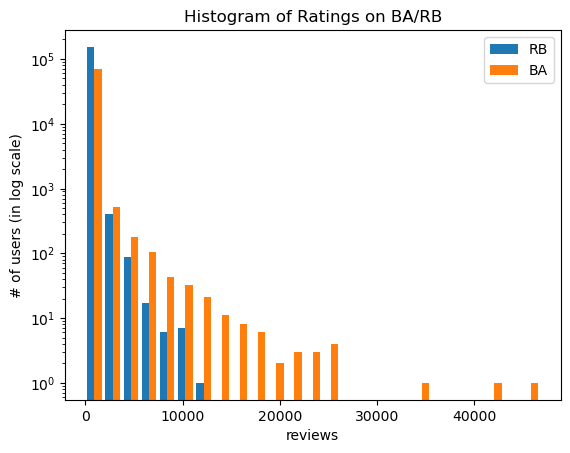

In [ ]:
plt.hist([ba_users['nbr_ratings'],rb_users['nbr_ratings']] , bins=25, log=True, stacked=False, histtype='bar', label=['RB','BA'])
plt.title('Histogram of number of user ratings on BA/RB')
plt.ylabel('# of users (in log scale)')
plt.xlabel('ratings')
plt.legend()
plt.show()



In [ ]:
print('Number of users (BA|RB): {}|{}\nNumber of ratings (BA|RB): {}|{}'.format( len(ba_users),len(rb_users), ba_users.nbr_ratings.sum(),rb_users.nbr_ratings.sum()))

Number of users (BA|RB): 153704|70174
Number of ratings (BA|RB): 8393032|7636401


Part 5: Diving Deeper into BeerAdvocate datasets

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


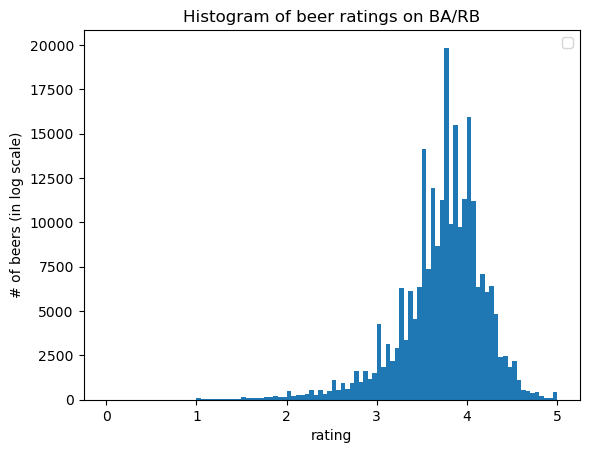

In [ ]:
ba_beers = ba_beers[ba_beers['nbr_ratings'] !=0 ]

plt.hist(ba_beers.avg, log=False, bins = 100 )
plt.title('Histogram of beer ratings in BA')
plt.ylabel('# of beers (in log scale)')
plt.xlabel('rating')
plt.legend()
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


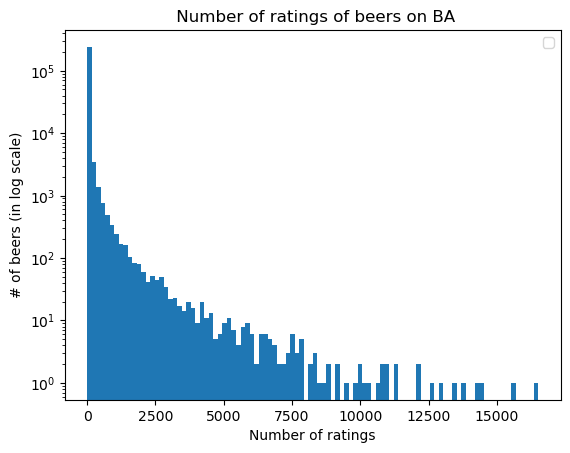

In [ ]:
plt.hist(ba_beers.nbr_ratings, log=True, bins = 100 )
plt.title(' Number of ratings of beers on BA')
plt.ylabel('# of beers (in log scale)')
plt.xlabel('Number of ratings')
plt.legend()
plt.show()


In [ ]:
ba_beers.groupby('main_style')['abv'].agg( ['mean', 'min', 'max', 'std','count'])

,mean,min,max,std,count
main_style,,,,,
Bocks,7.600517,2.60,65.0,2.552976,4351
Brown Ales,5.867823,0.50,15.0,1.521358,8677
Dark Ales,6.835382,1.70,15.0,1.531692,4207
Dark Lagers,5.452248,2.00,13.5,0.908436,6636
Hybrid Beers,5.922791,3.00,17.0,1.931447,2350
India Pale Ales,7.118414,0.50,41.0,1.501861,38452
Pale Ales,5.619732,0.25,17.2,1.205024,49620
Pale Lagers,5.243734,0.50,19.5,1.186392,15088
Porters,6.743368,2.25,18.6,1.704187,9541


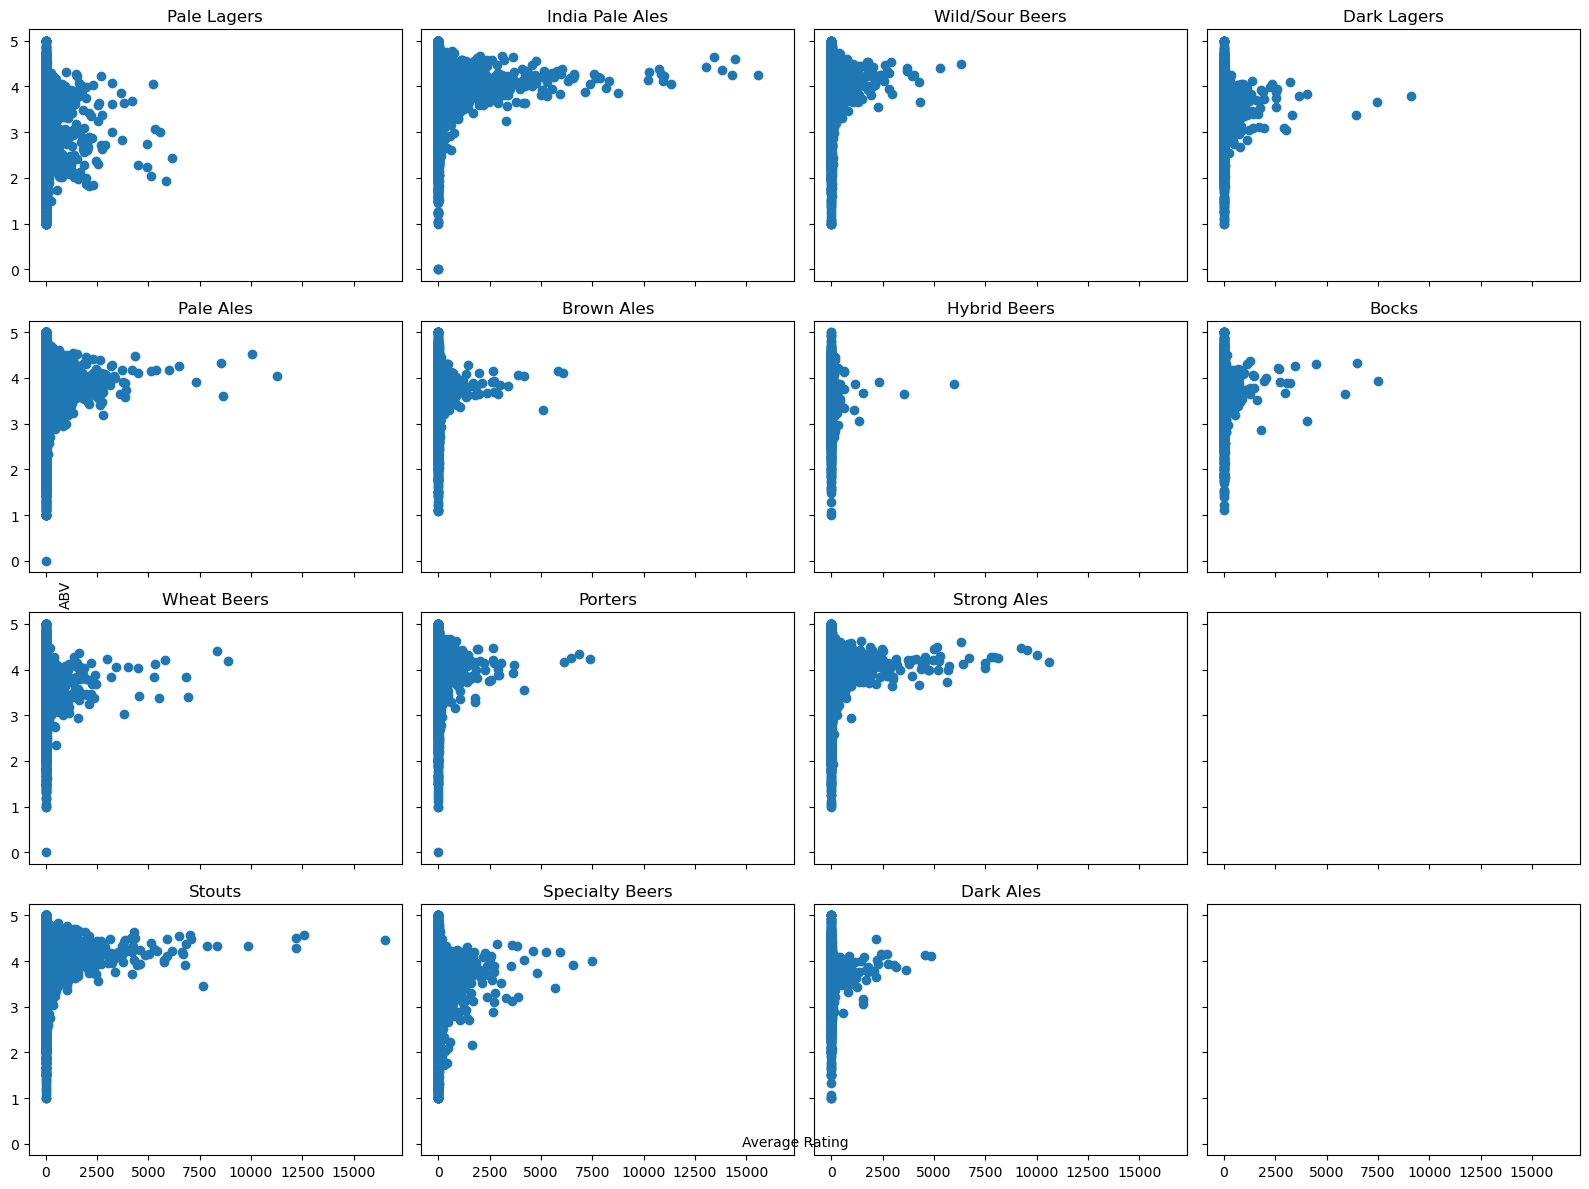

In [ ]:
# Write your code to make 4x4 panel here (Panel of correlation between abv and avg rating) 

# Assuming ba_beers is your DataFrame and it has columns 'avg' and 'abv'
fig, ax = plt.subplots(4, 4, figsize=(16, 12), sharey=True, sharex=True)  # Adjusted figsize for clarity
unique_main_styles = ba_beers['main_style'].unique()  # Get unique main styles

for i, main_style in enumerate(unique_main_styles):
    if i >= 16:  # Break if there are more than 16 main styles
        break
    sbplt = ax[i % 4, math.floor(i / 4)]
    sbplt.scatter( 'abv','avg', data=ba_beers[ba_beers['main_style'] == main_style])
    sbplt.set_title(main_style)

fig.tight_layout()
fig.text(0.5, 0.04, "Average Rating", ha='center')  # Adjusted text position and content
fig.text(0.04, 0.5, "ABV", va='center', rotation='vertical')  # Adjusted text position and content
plt.show()